In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [3]:
Housing_Data = pd.read_csv("Housing.csv")
Housing_Data.size
Housing_Data.shape
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
Housing_Data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
#Line Chat  -- Average price by Area
#Bar Graph  -- Average Price by Number of Bedrooms
#Scatter Plot  -- 
#Pie Chart   -- Average Price by Furnishing
#Histogram  -- For Price
#Count Map  --
#Horizontal Count Map  
#Splitted Count Map  --  Rooms count map hue of furnishing
#HeatMap  -- For total data
#Box Plot -- 


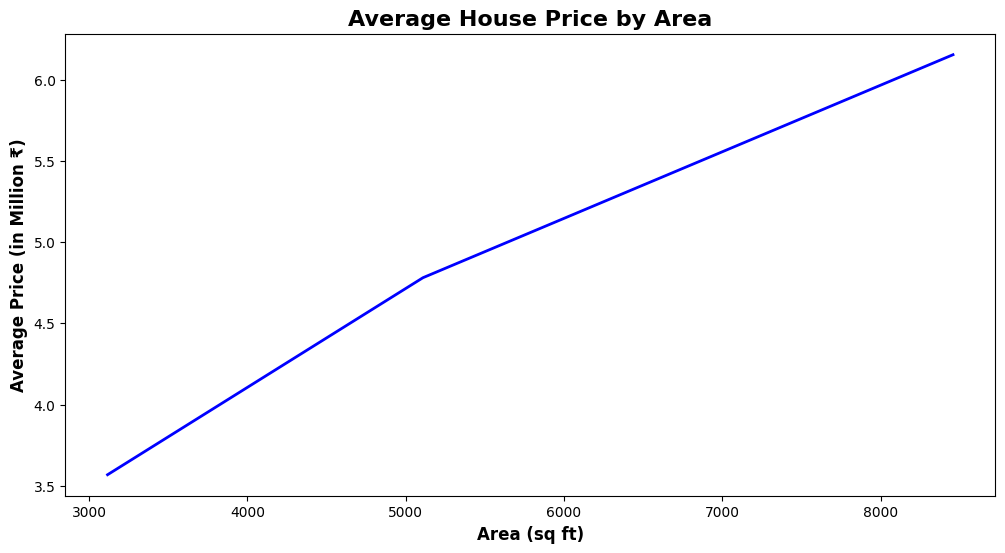

In [6]:
# Calculate average price for each unique area
avg_price_by_area = Housing_Data.groupby('area')['price'].mean().reset_index()

avg_price_by_area = avg_price_by_area.groupby(avg_price_by_area.index // 100).mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_area['area'], avg_price_by_area['price'] / 1e6, linewidth=2, color='blue')

plt.title('Average House Price by Area', fontsize=16, fontweight='bold')
plt.xlabel('Area (sq ft)', fontsize=12, fontweight='bold')
plt.ylabel('Average Price (in Million ₹)', fontsize=12, fontweight='bold')
plt.show()

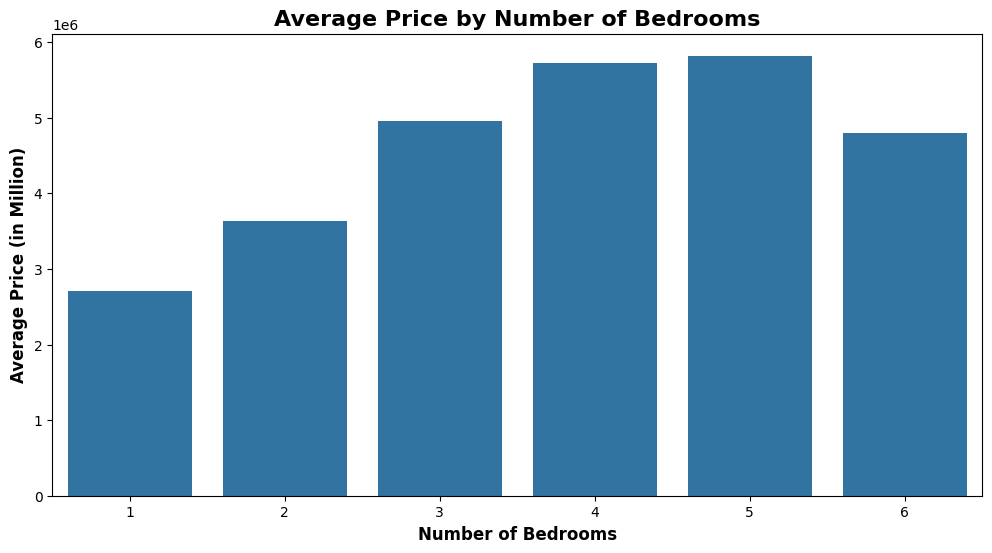

In [7]:
# Calculate average price for each number of bedrooms
avg_price_by_bedrooms = Housing_Data.groupby('bedrooms')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='bedrooms', y='price', data=avg_price_by_bedrooms)

plt.title('Average Price by Number of Bedrooms', fontsize=16, fontweight='bold')
plt.xlabel('Number of Bedrooms', fontsize=12, fontweight='bold')
plt.ylabel('Average Price (in Million)', fontsize=12, fontweight='bold')
plt.show()


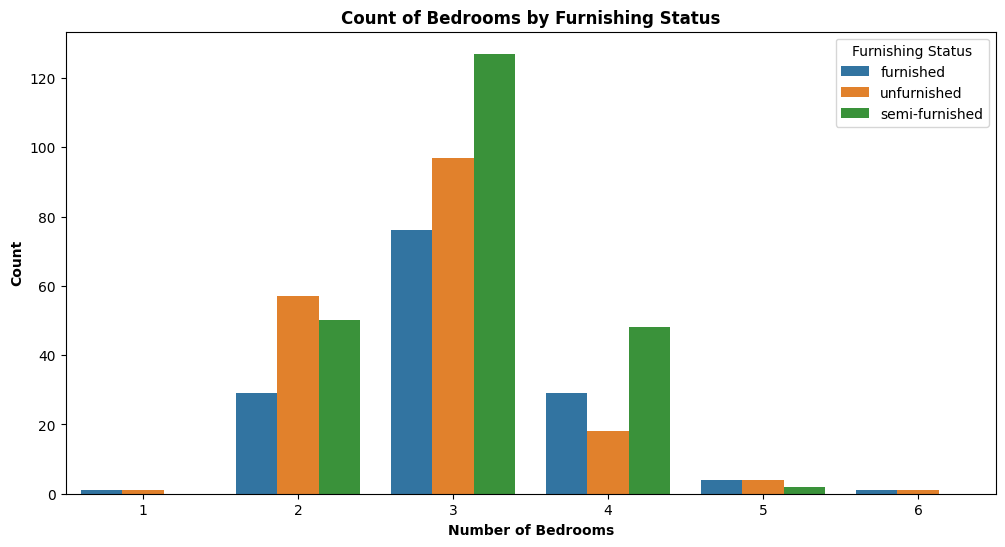

In [8]:
# Splitted Count Map for rooms with hue of furnishing
plt.figure(figsize=(12, 6))
sns.countplot(x='bedrooms', hue='furnishingstatus', data=Housing_Data)
plt.title('Count of Bedrooms by Furnishing Status', weight='bold')
plt.xlabel('Number of Bedrooms', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend(title='Furnishing Status')
plt.show()


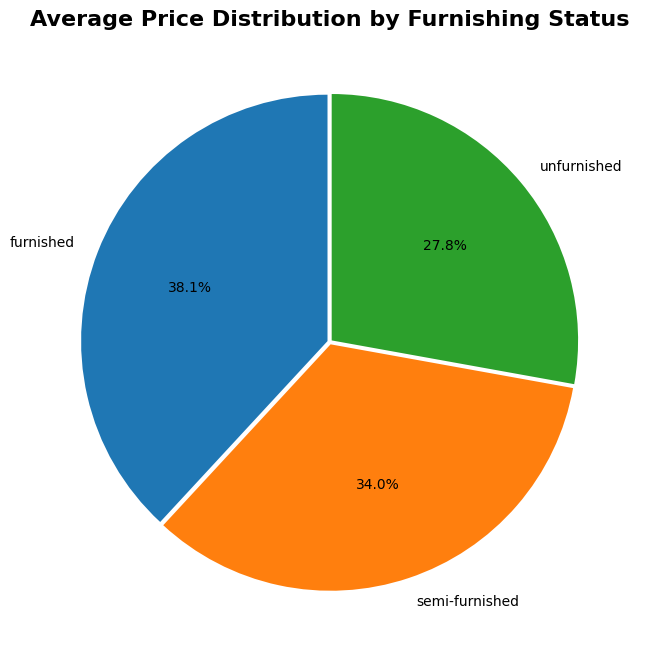

In [9]:
# Calculate average price for each furnishing status
avg_price_by_furnishing = Housing_Data.groupby('furnishingstatus')['price'].mean()

plt.figure(figsize=(10, 8))
plt.pie(avg_price_by_furnishing, labels=avg_price_by_furnishing.index, autopct='%1.1f%%',explode=[0.01,0.01,0.01], startangle=90)
plt.title('Average Price Distribution by Furnishing Status', fontsize=16, fontweight='bold')
plt.show()

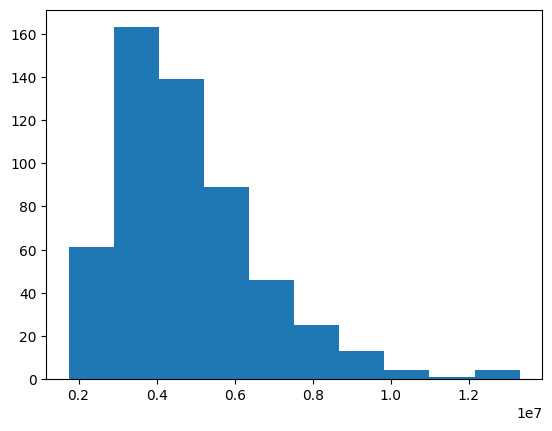

In [11]:
#Histogram
plt.hist(Housing_Data['price'])
plt.show()

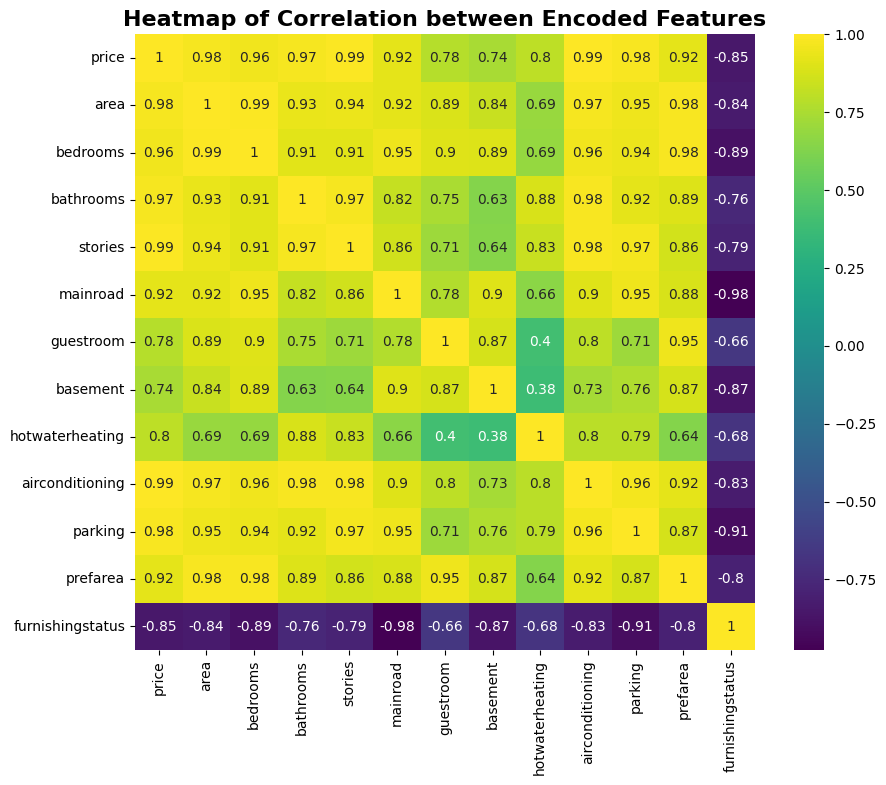

In [ ]:
# Encode the columns in the data for creating heatmap
encoded_data = pd.get_dummies(Housing_Data, drop_first=True)

grouped_data = encoded_data.groupby(encoded_data.index // 100).mean()

plt.figure(figsize=(10, 8))
sns.heatmap(grouped_data.corr(), annot=True, cmap='viridis')
plt.title('Heatmap of Correlation between Encoded Features', fontsize=16, fontweight='bold')
plt.show()
